In [1]:
import csv
import matplotlib as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In this notebook we will take the hardcoded batch size data and create some sttistics and graphs. We use colab instead of the server so that we can view the graphs instant, to speed up the workflow.

In [18]:
bsAccs = pd.read_csv('/drive/MyDrive/Colab Notebooks/Thesis Notebooks/results/batchAccuracies.csv')
bsAccs_melted = bsAccs.melt("batchSize",var_name="Test/Train Accuracy",value_name="Accuracy")#.rename(columns={"Test Accuracy&Train Accuracy":"Test&Train"})
bsAccs_melted["Test/Train Accuracy"].replace({"testAcc": "Test", "trainAcc": "Train"}, inplace=True)

In [19]:
bsAccs.iloc[bsAccs["testAcc"].argmax()]


batchSize    380.000000
testAcc        0.707288
trainAcc       0.762032
Name: 224, dtype: float64

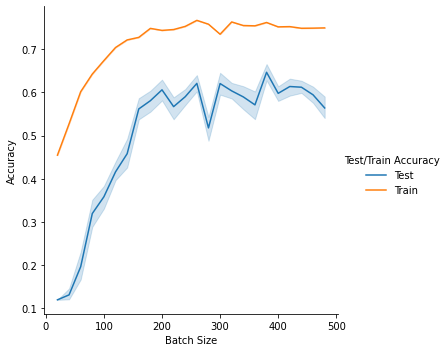

In [20]:
#Next we plot the data
p = sns.relplot(data=bsAccs_melted.rename(columns={"batchSize":"Batch Size", "testAcc":"Test Accuracy", "trainAcc":"Training Accuracy", "	testAcc&trainAcc":"Test/Train Accuracy"}), 
                x="Batch Size", y="Accuracy", hue="Test/Train Accuracy", kind="line")

In [ ]:
bcSpearmanCoeff = bsAccs.corr('spearman')['batchSize']['testAcc']
bcPearsonCoeff = bsAccs.corr('pearson')['batchSize']['testAcc']
bcKendallCoeff = bsAccs.corr('kendall')['batchSize']['testAcc']
print("Pearson Coeff:" + str(bcPearsonCoeff))
print("Spearman Coeff:" + str(bcSpearmanCoeff))

Pearson Coeff:0.7608217460197045
Spearman Coeff:0.6815235788570365


So you've got a decent graph. Going to enrich with training accs as well. Also gonna run more than 5 predictions, hopefully to smooth out the chaoticness near bs=300/400.

In [ ]:
bsAccs.loc[bsAccs["testAcc"]>0.60]

,batchSize,testAcc,trainAcc
84,160,0.633214,0.727554
85,160,0.622461,0.727554
88,160,0.600956,0.727554
99,180,0.617682,0.748382
102,180,0.645161,0.748382
...,...,...,...
271,460,0.610514,0.748945
272,460,0.606930,0.748945
274,460,0.643967,0.748945
275,460,0.617682,0.748945


In [ ]:
bsAccs.iloc[bsAccs["testAcc"].argmax()]

batchSize    380.000000
testAcc        0.707288
trainAcc       0.762032
Name: 224, dtype: float64

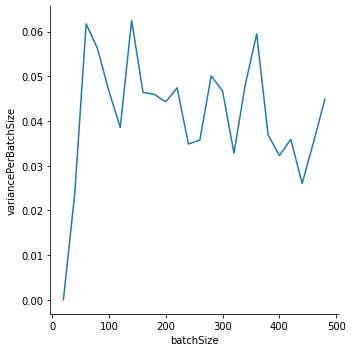

In [ ]:
#Here we explicitly graph the variance

sns.relplot(
    data=bsAccs.groupby("batchSize").std().rename(columns={"testAcc":"variancePerBatchSize"}), 
    x="batchSize", y="variancePerBatchSize", kind="line",
);
